In [54]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## Data Import

In [55]:
new = pd.read_excel(r"C:\Users\justw\Downloads\Machine Learning with Python\Linear Regression\Practise\AirPollution.xls") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer
...,...,...,...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09,Bhosari,2004-09-01,Monsoon
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14,Bhosari,2004-09-08,Monsoon
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64,Bhosari,2004-09-15,Monsoon
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95,Bhosari,2004-09-22,Monsoon


In [56]:
new=new.drop(['Site','Date','Season'],axis=1)
new

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


## Data Type 

In [57]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    151 non-null    float64
 1   Pb      151 non-null    float64
 2   Cd      151 non-null    float64
 3   Cu      151 non-null    float64
 4   Cr      151 non-null    float64
 5   Zn      151 non-null    int64  
 6   NOx     151 non-null    float64
 7   SO2     151 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.6 KB


## Univariate Analysis

In [58]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


## EDA

<AxesSubplot:>

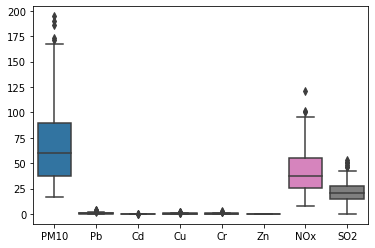

In [59]:
sns.boxplot(data=new)

In [60]:
q1 = new['PM10'].quantile(0.25)
q3 = new['PM10'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

169.0425

In [61]:
new['PM10']=np.where(new['PM10'] > upper_limit,upper_limit,new['PM10']) # upper limit

<AxesSubplot:>

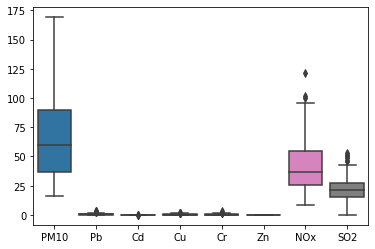

In [62]:
sns.boxplot(data=new)

In [63]:
q1 = new['NOx'].quantile(0.25)
q3 = new['NOx'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

98.13499999999999

In [64]:
new['NOx']=np.where(new['NOx'] > upper_limit,upper_limit,new['NOx'])

<AxesSubplot:>

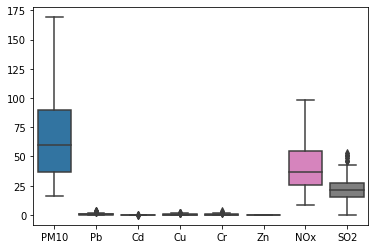

In [65]:
sns.boxplot(data=new)

In [66]:
q1 = new['SO2'].quantile(0.25)
q3 = new['SO2'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

45.80250000000001

In [67]:
new['SO2']=np.where(new['SO2'] > upper_limit,upper_limit,new['SO2'])

<AxesSubplot:>

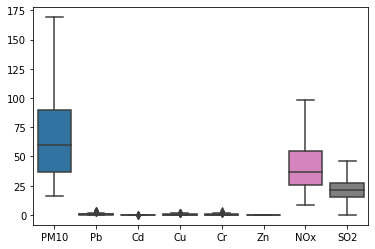

In [68]:
sns.boxplot(data=new)

In [69]:
q1 = new['Pb'].quantile(0.25)
q3 = new['Pb'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2.0825

In [70]:
new['Pb']=np.where(new['Pb'] > upper_limit,upper_limit,new['Pb'])

<AxesSubplot:>

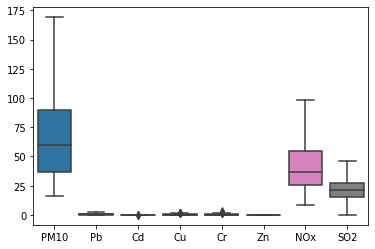

In [71]:
sns.boxplot(data=new)

In [72]:
q1 = new['Cd'].quantile(0.25)
q3 = new['Cd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

0.0

In [73]:
new['Cd']=np.where(new['Cd'] > upper_limit,upper_limit,new['Cd'])

<AxesSubplot:>

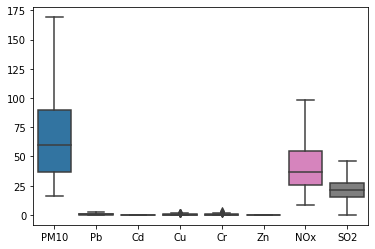

In [74]:
sns.boxplot(data=new)

In [75]:
q1 = new['Cu'].quantile(0.25)
q3 = new['Cu'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.2775

In [76]:
new['Cu']=np.where(new['Cu'] > upper_limit,upper_limit,new['Cu'])

<AxesSubplot:>

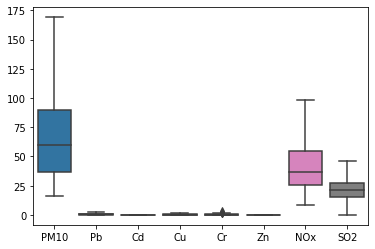

In [77]:
sns.boxplot(data=new)

In [78]:
q1 = new['Cr'].quantile(0.25)
q3 = new['Cr'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

1.3224999999999998

In [79]:
new['Cr']=np.where(new['Cr'] > upper_limit,upper_limit,new['Cr'])

<AxesSubplot:>

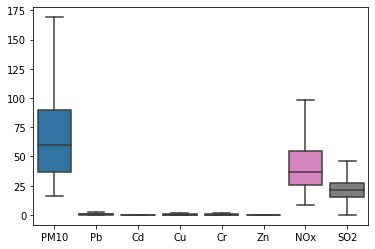

In [80]:
sns.boxplot(data=new)

In [81]:
new.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.00000,151.000000,151.0,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.06856,0.679983,0.0,0.327053,0.372848,0.0,42.501755,22.226656
std,39.61346,0.560941,0.0,0.395327,0.361985,0.0,22.551657,10.049931
min,16.24000,0.000000,0.0,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.00500,0.220000,0.0,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.61000,0.570000,0.0,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.82000,0.965000,0.0,0.535000,0.580000,0.0,54.695000,27.420000
max,169.04250,2.082500,0.0,1.277500,1.322500,0.0,98.135000,45.802500


In [82]:
new.isna().sum()

PM10    0
Pb      0
Cd      0
Cu      0
Cr      0
Zn      0
NOx     0
SO2     0
dtype: int64

## Splitting the data into train and test set

In [83]:
new.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.0825,0.0,0.53,0.6100,0,84.17,40.3700
1,140.25,2.0825,0.0,0.10,0.9100,0,88.81,39.4800
2,107.01,1.3100,0.0,0.19,0.4800,0,81.49,45.8025
3,88.81,0.7600,0.0,0.33,0.3900,0,61.80,27.4200
4,75.05,0.6000,0.0,0.41,1.3225,0,48.71,19.2300


In [84]:
# Putting feature variable to X
X = new.drop('PM10', axis= 1)

# Putting response variable to y
y = new[['PM10']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [85]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
125,26.19,0.00,0.0,0.16,0.04,0,22.14,10.93
48,40.92,0.39,0.0,0.08,0.21,0,26.00,13.66
149,52.10,0.48,0.0,0.04,0.06,0,42.08,22.95
55,90.48,0.72,0.0,0.00,0.02,0,39.16,15.72
63,141.11,1.39,0.0,0.53,0.71,0,80.72,34.31


## Correlation Matrix

In [86]:
df.corr()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
PM10,1.000000,0.881124,NaN,0.696160,0.841537,NaN,0.551074,0.519019
Pb,0.881124,1.000000,NaN,0.643005,0.771554,NaN,0.649313,0.595104
Cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cu,0.696160,0.643005,NaN,1.000000,0.759803,NaN,0.444826,0.433378
Cr,0.841537,0.771554,NaN,0.759803,1.000000,NaN,0.475384,0.438371
Zn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOx,0.551074,0.649313,NaN,0.444826,0.475384,NaN,1.000000,0.860182
SO2,0.519019,0.595104,NaN,0.433378,0.438371,NaN,0.860182,1.000000


In [90]:
df.drop(['Cd','Zn'],axis=1)
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
125,26.19,0.0000,0.0,0.16,0.04,0,22.14,10.93
48,40.92,0.3900,0.0,0.08,0.21,0,26.00,13.66
149,52.10,0.4800,0.0,0.04,0.06,0,42.08,22.95
55,90.48,0.7200,0.0,0.00,0.02,0,39.16,15.72
63,141.11,1.3900,0.0,0.53,0.71,0,80.72,34.31
...,...,...,...,...,...,...,...,...
56,97.09,0.9800,0.0,0.02,0.19,0,49.19,29.14
47,43.29,0.3800,0.0,0.09,0.26,0,24.96,19.39
10,50.04,0.7100,0.0,0.08,0.19,0,39.96,17.58
126,19.22,0.0000,0.0,0.09,0.00,0,30.99,24.37


<AxesSubplot:>

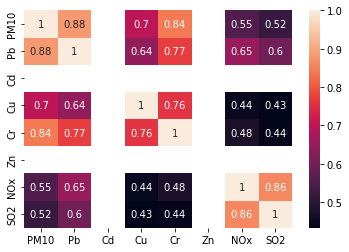

In [91]:
sns.heatmap(df.corr(),annot = True)

In [88]:
X1=df.drop(['PM10','NOx'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

C:\Users\justw\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pb     7.687853
Cd          NaN
Cu     3.751185
Cr     6.589538
Zn          NaN
SO2    3.835246
dtype: float64

In [89]:
df

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
125,26.19,0.0000,0.0,0.16,0.04,0,22.14,10.93
48,40.92,0.3900,0.0,0.08,0.21,0,26.00,13.66
149,52.10,0.4800,0.0,0.04,0.06,0,42.08,22.95
55,90.48,0.7200,0.0,0.00,0.02,0,39.16,15.72
63,141.11,1.3900,0.0,0.53,0.71,0,80.72,34.31
...,...,...,...,...,...,...,...,...
56,97.09,0.9800,0.0,0.02,0.19,0,49.19,29.14
47,43.29,0.3800,0.0,0.09,0.26,0,24.96,19.39
10,50.04,0.7100,0.0,0.08,0.19,0,39.96,17.58
126,19.22,0.0000,0.0,0.09,0.00,0,30.99,24.37
